### Exercise 3 Integrals

In [41]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from numpy import random

In [42]:
#trapezoide
#parameters, the function to integrate, lower limit, upper limit, number of trapezoids
def trapezoids_int(function, ll, ul, numt):
    x = np.zeros([numt + 1])
    delta = (ul - ll)/numt
    #lower_value
    x[0] = ll
    #higher_value
    x[numt] = ul
    #The sumatory of the trapezoids
    sumatory = 0
    for d in np.arange(1,numt):
        x[d] = x[d - 1] + delta
        sumatory = sumatory +  function(x[d])
    #applying the trapezoids equation for integration
    numerical_value = (delta/2)*(function(x[0]) + 2*sumatory + function(x[numt]))
    return numerical_value
#def prueba(x):
#    return x**2
#a = trapezoids_int(prueba,0,1,10001)
#print ("The numerical value of the integral is: ", a)  

In [43]:
#simpson 
#parameters, the function to integrate, lower limit, upper limit, number of points
def simpson_int(function_simp, ll, ul, nums):
    delta = (ul-ll)/nums
    x = np.arange(ll,ul,delta)
    x0 = function_simp(x[0])
    xn = function_simp(x[-1])
    y=function_simp(x)
    suma = delta/3.0*((x0 + xn)) + delta/3.0*np.sum(4.0*(y[1:-1:2])) +  delta/3.0*np.sum(2.0*(y[2:nums-1:2]))
    return suma
#def prueba(x):
#    return np.cos(x)
#a = simpson_int(prueba,-np.pi/2,np.pi,1000)
#print ("The numerical value of the integral is: ", a)  

In [44]:
#Montcarlo
def montcarlo_int(function, ll,ul,numm):
    xrandom = np.zeros([numm])
    integral = 0.0
    for i in range (len(xrandom)):
        xrandom[i] = np.random.uniform(ll,ul)
    for j in range(numm):
        integral = integral + function(xrandom[j])
        respuesta = (ul - ll)/float(numm)*integral
    return respuesta
#def prueba(x):
#     return np.cos(x)
#a = montcarlo_int(prueba,-np.pi/2,np.pi,8999)
#print ("The numerical value of the integral is: ", a) 

In [45]:
#mean_value_integral
def mean_value_int(function,ll,ul,nume):
    x = random.random(nume) * (ul - ll) + ll
    func_mean = function(x)
    inte_value = np.average(func_mean)*(ul-ll)
    return inte_value

#def prueba(x):
#    return x**2
#a = montcarlo_int(prueba,0,1,1000111)
#print ("The numerical value of the integral is: ", a) 

### Punto 3A

In [46]:
def fun_punto1(x):
    return np.cos(x)
ll = -np.pi/2
ul = np.pi
n = 999
#-------------------------
#analítica
int_analitica = 1
#--------------------------#
#Trapezoide
t = trapezoids_int(fun_punto1,ll,ul,n)
error_tra = abs(t-int_analitica)/int_analitica
print("Metodo: Trapezoides, el valor de la integral es:",t, "el error es:",error_tra)
#--------------------------#
# simpson
s = simpson_int(fun_punto1,ll,ul,n)
error_simp = abs(s-int_analitica)/int_analitica
print("Metodo: Simpsonn, el valor de la integral es:",s, "el error es:",error_simp)
#--------------------------#
#Montecarlo
m = montcarlo_int(fun_punto1,ll,ul,n)
error_mot = abs(m-int_analitica)/int_analitica
print("Metodo: Monte carlo, el valor de la integral es:",m, "el error es",error_mot)
#--------------------------#
#Valor medio
vm = mean_value_int(fun_punto1,ll,ul,n)
error_mean = abs(m-int_analitica)/int_analitica
print("Metodo: Valor medio, el valor de la integral es:",vm,"el error es",error_mean)

Metodo: Trapezoides, el valor de la integral es: 0.9999981457418148 el error es: 1.8542581852187823e-06
Metodo: Simpsonn, el valor de la integral es: 1.004717071102267 el error es: 0.004717071102267045
Metodo: Monte carlo, el valor de la integral es: 1.0679044034295193 el error es 0.06790440342951931
Metodo: Valor medio, el valor de la integral es: 1.0887310625640556 el error es 0.06790440342951931


### Punto 3B

In [47]:
#error en función del número de puntos
Narray=np.logspace(2,7,6)
Narray[:] = Narray[:]+1
#analítica
int_analitica = 1
def fun_puntob(x):
    return np.cos(x)
ll = -np.pi/2
ul = np.pi
error_trape = np.empty(len(Narray))
for i in range(len(Narray)):
    trape = trapezoids_int(fun_puntob, ll, ul,int(Narray[i]))
    error_trape[i] = 1.0*abs(trape-int_analitica)/int_analitica
                          
error_simp = np.empty(len(Narray))
for i in range(len(Narray)):
    simp = simpson_int(fun_puntob,ll,ul,int(Narray[i]))
    error_simp[i] = abs(simp-int_analitica)/int_analitica
                          
error_mont = np.empty(len(Narray))  
for i in range(len(Narray)):
    monte = montcarlo_int(fun_puntob,ll,ul,int(Narray[i]))
    error_mont[i] = abs(monte-int_analitica)/int_analitica
                          
error_mean = np.empty(len(Narray))
for i in range(len(Narray)):
    medios = mean_value_int(fun_puntob,ll,ul,int(Narray[i]))
    error_mean[i] = abs(medios-int_analitica)/int_analitica


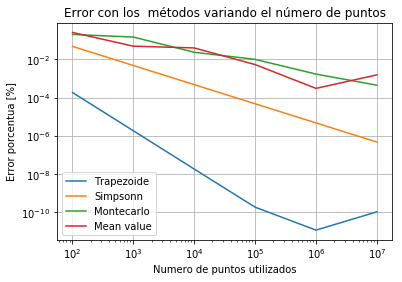

In [48]:
plt.loglog(Narray,error_trape, label="Trapezoide")
plt.loglog(Narray,error_simp, label="Simpsonn")
plt.loglog(Narray,error_mont, label="Montecarlo")
plt.loglog(Narray,error_mean, label="Mean value")
plt.grid(True)
plt.legend(loc = 0)
plt.title("Error con los  métodos variando el número de puntos")
plt.ylabel("Error porcentua [%]")
plt.xlabel("Numero de puntos utilizados")
plt.savefig("MartinezDiego_int_error.pdf",format="pdf");

### Punto 3 C

In [49]:
def func_puntoc(x):
    return 1.0/np.sqrt(np.sin(x))
n = 1025
ll = 0.0
ul= 1.0
x = np.linspace(ll,ul,n)
#Trapezoide
t = trapezoids_int(func_puntoc,ll,ul,n)
print("Metodo: Trapezoides, el valor de la integral es:",t)
#--------------------------#
# simpson
s = simpson_int(func_puntoc,ll,ul,n)
print("Metodo: Simpsonn, el valor de la integral es:",s)
#--------------------------#
#Montecarlo
m = montcarlo_int(func_puntoc,ll,ul,n)
print("Metodo: Monte carlo, el valor de la integral es:",m)
#--------------------------#
#Valor medio
vm = mean_value_int(func_puntoc,ll,ul,n)
print("Metodo: Valor medio, el valor de la integral es:",vm)
print("en este momento las integrales dan una respuesta erroada por la singularidad")

Metodo: Trapezoides, el valor de la integral es: inf
Metodo: Simpsonn, el valor de la integral es: inf
Metodo: Monte carlo, el valor de la integral es: 2.0001919209377648
Metodo: Valor medio, el valor de la integral es: 2.130078919425751
en este momento las integrales dan una respuesta erroada por la singularidad


c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [50]:
#rimera forma para corregir la singularidad.cambiando infinito por 10**6
n = 1025
ll = 0.0
ul= 1.0
def func_puntoc_op1(x):
    func = 1.0/np.sqrt(np.sin(x))
    if(type(x) == list or type(x)==np.ndarray):
        if(len(x[np.where(x==0)])!= 0):
            func[np.where(x==0.0)]=10**6
    else:
            if(x==0):
                func = 10**6
    return func
sim = simpson_int(func_puntoc_op1,ll,ul,n)
print("El nuevo valor de la integral usando el metodo de Simpson cambiando infinito por 10**6 el valor de la integral es:",sim)

El nuevo valor de la integral usando el metodo de Simpson cambiando infinito por 10**6 el valor de la integral es: 327.1976777800197


c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [51]:
#segunda forma para corregir la singularidad.cambiando cero por 10**6
def func_puntoc(x):
    return 1.0/np.sqrt(np.sin(x))
n = 1025
ll = 10**-6
ul= 1.0
x = np.linspace(ll,ul,n)
# simpson
s = simpson_int(func_puntoc,ll,ul,n)
print("El nuevo valor de la integral usando el metodo de Simpson evaluando la funcion en 10**6 y noen cero el valor de la integral es",s)

El nuevo valor de la integral usando el metodo de Simpson evaluando la funcion en 10**6 y noen cero el valor de la integral es 2.319582813891773


In [52]:
#tercera forma para corregir la singularidad.restando la singularidad.
n = 1025
ll = 0
ul= 1.0
x = np.linspace(ll,ul,n)
def func_punto3_restando(x):
    func = (1/np.sqrt(np.sin(x)))-(1/np.sqrt(x))
    if(type(x)==np.ndarray):
        func[0] = 0
    else:
        func  = 0
    return func

Integralboba = 2*(np.sqrt(1)-np.sqrt(0))
valor_de_la_integral = 2.03480532


sasas = simpson_int(func_punto3_restando,ll,ul,n) + Integralboba
print("restando la singularidad el resultado es",sasas)
error_met3= abs(sasas - valor_de_la_integral)/valor_de_la_integral*100

restando la singularidad el resultado es 2.034688188940724


c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
c:\users\diegomartinez\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


In [53]:
print("El método que es mas cercano al valor de la integral es el método 3, la resta de la singularidad, con un error de:" , error_met3)

El método que es mas cercano al valor de la integral es el método 3, la resta de la singularidad, con un error de: 0.005756376697295004
